### <center>Context</center>
<p align='justify'>
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
</p>

<p align='justify'>
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
</p>



### <center>Goal</center>
This notebook aims to predict whether a patient is prone to heart disease or not according to a set of features.


### <center>Dataset Specifications</center>
<p align='justify'>
The dataset contains multiple numerical and categorical features. Therefore, it is necessary to propose a method to handle categorical features. One-Hot-Encoding or Label-Encoding (mapping categorical features to integers) might be useful for this purpose.
</p>
<p align='justify'>
This dataset also contains some missing values. Although using `df.describe()` might not reveal this problem since missing values are specified with `0` rather than `NaN`, by taking a look at the records of this dataset can help a lot to find missing values.
</p>
<p align='justify'>
This notebook proposes a method for filling missing values instead of removing the data records.
</p>

**Attribute Information**
1. **Age**: Age of the patient [years]

2. **Sex**: Sex of the patient [M: Male, F: Female]

3. **ChestPainType**: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. **RestingBP**: Resting blood pressure [mm Hg]

5. **Cholesterol**: Serum cholesterol [mg/dl] (includes missing values)

6. **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]

9. **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
"Exercise-induced angina" refers to a condition where a person experiences chest pain or discomfort during physical activity or exercise. Angina is typically caused by reduced blood flow to the heart muscles due to narrowed or blocked coronary arteries. During exercise, the heart requires more oxygen and blood flow to meet the increased demand, and if the arteries are narrowed, the heart may not receive enough oxygen-rich blood, leading to angina symptoms.

10. **Oldpeak**: Oldpeak = ST [Numeric value measured in depression]

11. **ST_Slope**: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
"ST_Slope" refers to the slope of the peak exercise ST segment, which is a part of the electrocardiogram (ECG) waveform. The ST segment represents the interval between the end of the S wave (ventricular depolarization) and the beginning of the T wave (ventricular repolarization) on the ECG.
12. **HeartDisease**: Output class [1: heart disease, 0: Normal]

### <center>Notebook Contents</center>
- Dataset Information
- Data Visualization & Handling Missing Values
- Converting Categorical Features to Numerical Features
- Feature Scaling
- Training Classifiers
- Results
- Comparison of Models

### <center>Citation</center>
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

**Stage 1: Libraries**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Stage 2: Loading Data**

In [36]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [37]:
df.shape

(918, 12)

**Stage 3: Dataset Information**

In [38]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
df.dropna().shape

(918, 12)

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Although the dataset does not appear to have any missing values, some parameters are not recorded for some patients (including cholesterol and resting blood pressure). `0` is used to represent missing values rather than `NaN`.

**Stage 4: Visualization**

4.1. Target

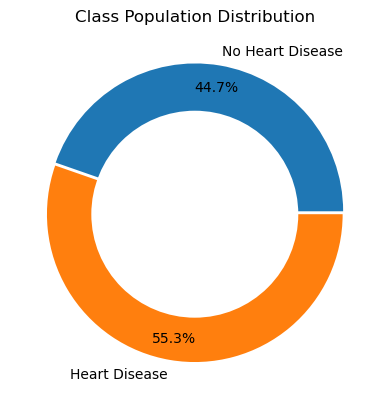

In [42]:
# Map targets to meaningful statements
classes = {
    'No Heart Disease': 0,
    'Heart Disease': 1
}
# Find the number of patients with/without heart disease
class_pop = [len(df[df['HeartDisease'] == _class]) for _class in classes.values()]

# Drawing a donut chart
plt.title('Class Population Distribution')
plt.pie(
    x=class_pop,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
    pctdistance=0.85
)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig('Class Population.jpg', dpi=300)
plt.show()

Fortunately, dataset is quite balanced.

4.2. Age

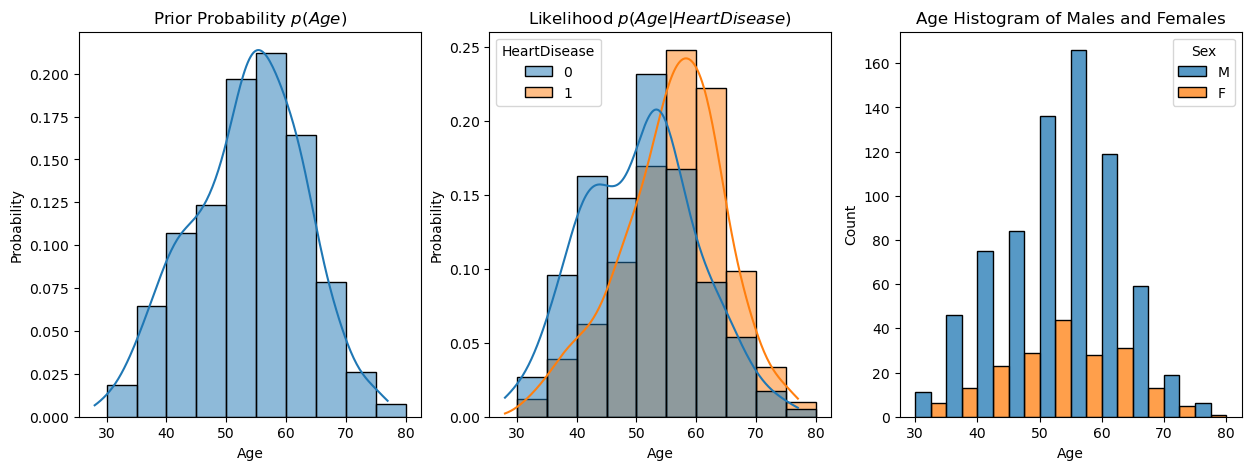

In [43]:
# Plotting multiple diagrams to figure out the distribution of age and also risk of heart disease in different ages
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(Age)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    stat='probability', common_norm=False,
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title(r'Likelihood $p(Age|HeartDisease)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Age Histogram of Males and Females')
sns.histplot(
    data=df, x='Age',
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='Sex',
    multiple='dodge',
    ax=axes[2]
)

plt.savefig('Age.jpg', dpi=300)
plt.show()

- Probability Distribution: Normal
- Interpretation 1: Patients having heart disease are more likely to be 55-60 years old.

4.3. Sex

AttributeError: 'numpy.int64' object has no attribute 'startswith'

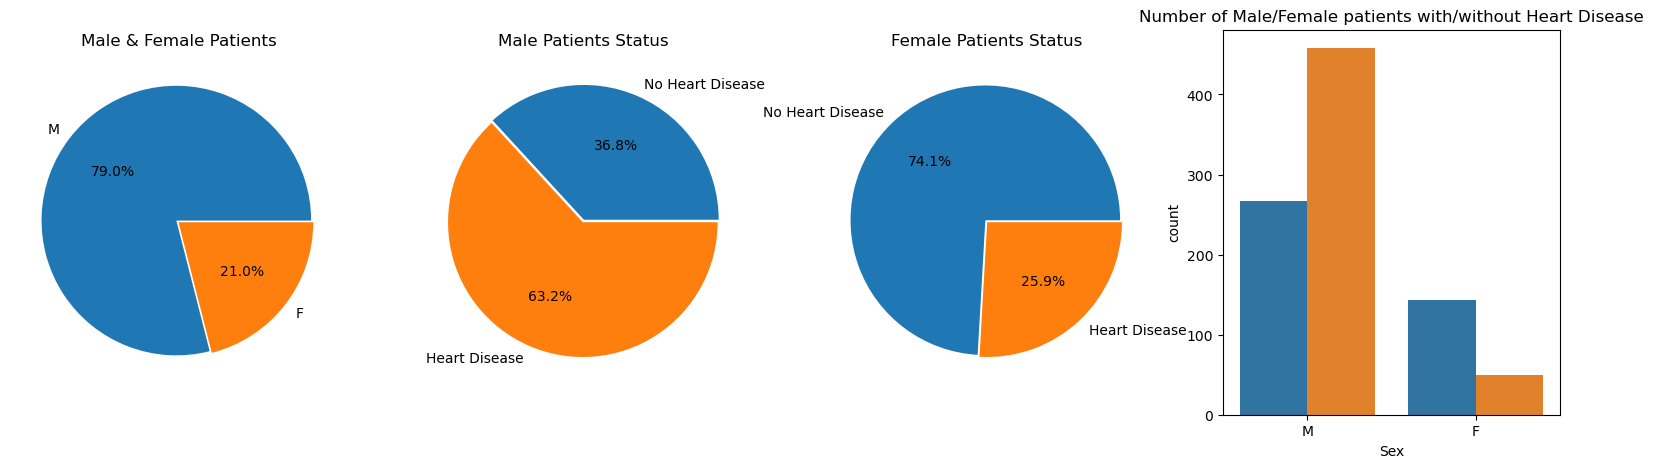

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

genders = df['Sex'].unique()
gender_pop = [len(df[df['Sex'] == _gender]) for _gender in genders]

plt.subplot(1, 4, 1)
plt.title('Male & Female Patients')
plt.pie(
    x=gender_pop,
    labels=genders,
    autopct='%.1f%%',
    explode=[0.02, 0],
)

# Status of male and female patients
male_stat = [len(df[(df['Sex'] == 'M') & (df['HeartDisease'] == _class)]) for _class in classes.values()]
female_stat = [len(df[(df['Sex'] == 'F') & (df['HeartDisease'] == _class)]) for _class in classes.values()]

plt.subplot(1, 4, 2)
plt.title('Male Patients Status')
plt.pie(
    x=male_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 3)
plt.title('Female Patients Status')
plt.pie(
    x=female_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 4)
plt.title('Number of Male/Female patients with/without Heart Disease')
sns.countplot(
    data=df, x='Sex',
    hue='HeartDisease',
    ax=axes[3]
)

plt.savefig('Sex.jpg', dpi=300)
plt.show()

Interpretation 1: The Majority of the patients in the dataset are male
Interpretation 2: As opposed to male patients in the dataset, female patients are less prone to heart failures

4.4. Chest Pain Type

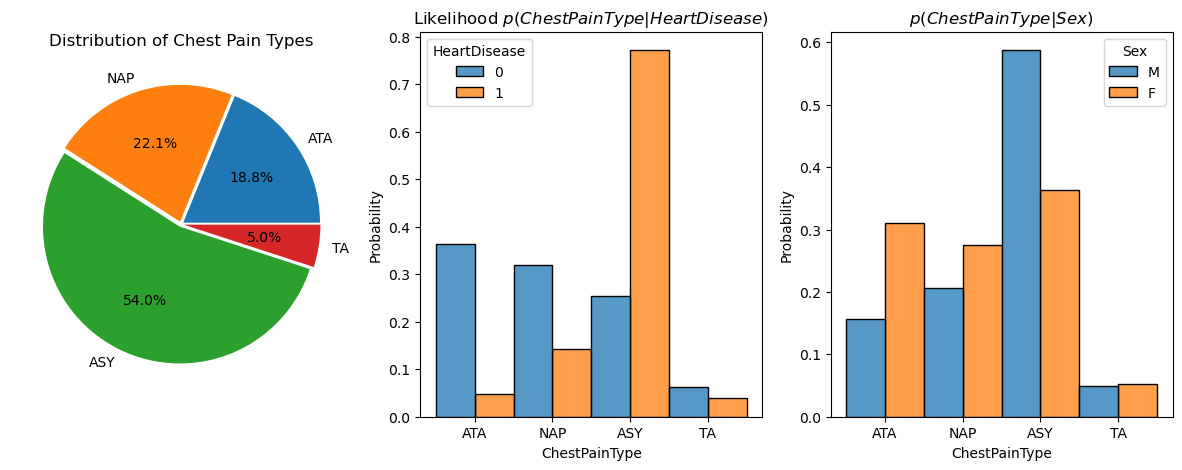

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pains = df['ChestPainType'].unique()
pains_pop = [len(df[df['ChestPainType'] == _pain]) for _pain in pains]

plt.subplot(1, 3, 1)
plt.title('Distribution of Chest Pain Types')
plt.pie(
    x=pains_pop,
    labels=pains,
    autopct='%.1f%%',
    explode=0.02 * np.ones(len(pains))
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(ChestPainType|HeartDisease)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(ChestPainType|Sex)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.savefig('Chest Pain Type.jpg', dpi=300)
plt.show()

Interpretation 1: The majority of patients had chest pain of type 'ASY' while only a few had 'TA'. Since the dataset is balanced with respect to heart disease, we can interpret that if a patient has chest pain of type 'ASY', it is probable that he/she has heart disease.

4.5. Resting Blood Pressure

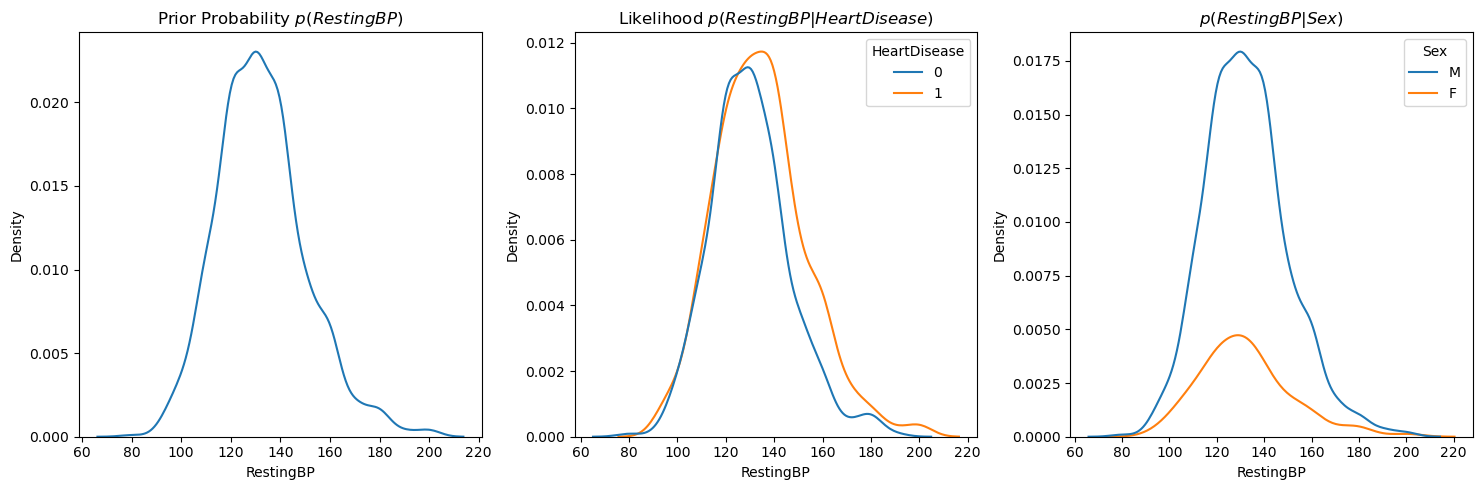

In [46]:
# RestingBP is not recorded for one patient. Since one data record would not cause much difference, we can remove that.
df = df.drop(df.index[df['RestingBP'] == 0], axis=0, inplace=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(RestingBP)$')
sns.kdeplot(
    data=df, x='RestingBP',
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(RestingBP|HeartDisease)$')
sns.kdeplot(
    data=df, x='RestingBP',
    hue='HeartDisease',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(RestingBP|Sex)$')
sns.kdeplot(
    data=df, x='RestingBP',
    hue='Sex',
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('RestingBP.jpg', dpi=300)
plt.show()

Probability Distribution: Normal
Interpretation 1: patients suffering from heart disease have a slight more **average** resting blood pressure. Average blood pressure in male and female patients is the same.

4.6. Cholesterol

In [47]:
# Cholesterol is not recorded for some patients. Find the number of patients whose cholesterol is not recorded to decide whether to remove records with missing values or not
n_patients = len(df[df['Cholesterol'] == 0])
print(f'Patients for whom cholesterol is not recorded: {n_patients}{os.linesep}Equivalent to {100 * n_patients / len(df):.2f}% of the dataset')

Patients for whom cholesterol is not recorded: 171
Equivalent to 18.65% of the dataset


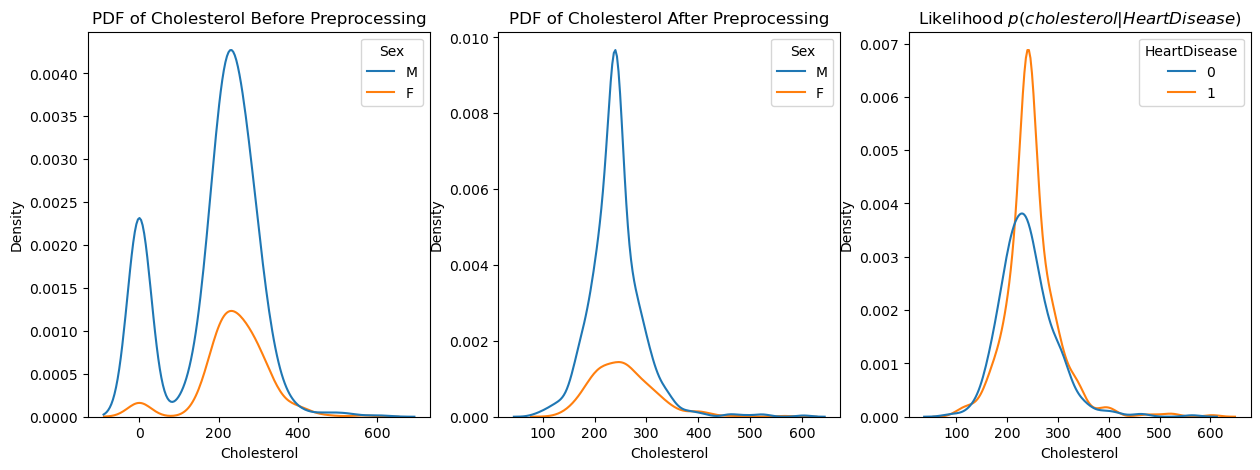

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('PDF of Cholesterol Before Preprocessing')
sns.kdeplot(
    data=df, x='Cholesterol',
    hue='Sex',
    ax=axes[0]
)

# Fill cholesterol for patients whose cholesterol is not recorded -> strategy: mean
# Calculate the mean cholesterol for male and female separately and replace with 0s in the data
df_filled = df.copy()
df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M'), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'M'), 'Cholesterol'].mean()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'F'), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'F'), 'Cholesterol'].mean()

plt.subplot(1, 3, 2)
plt.title('PDF of Cholesterol After Preprocessing')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='Sex',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(cholesterol|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='HeartDisease',
    ax=axes[2]
)

plt.savefig('Cholesterol.jpg', dpi=300)
plt.show()

Probability Distribution: Normal
Interpretation 1: Male and female patients have quite the same average cholesterol.
Interpretation 2: Patients suffering from heart disease have slightly more **average** cholesterol

4.7. Fasting Blood Sugar

AttributeError: 'numpy.int64' object has no attribute 'startswith'

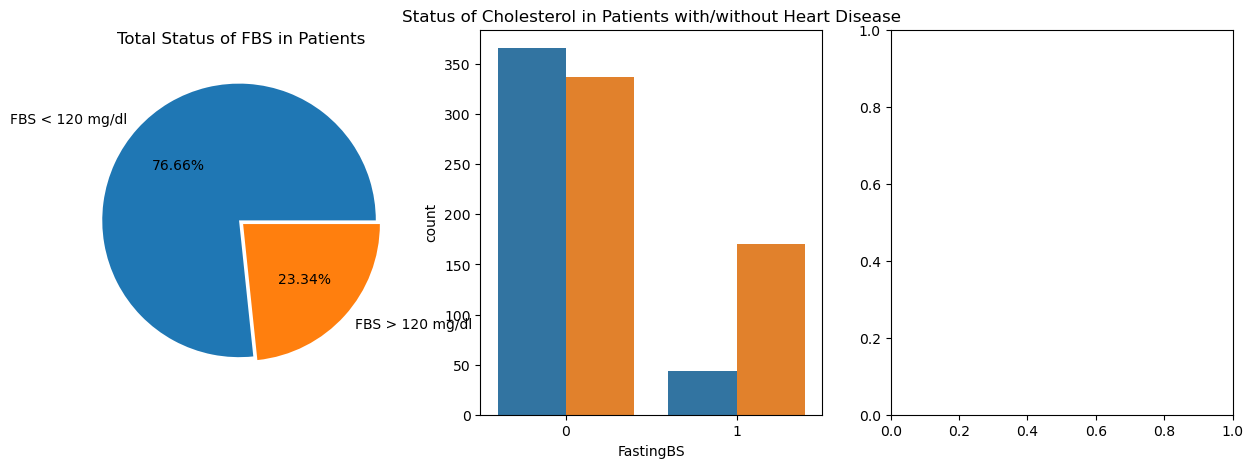

In [49]:
# As mentioned in 'Dataset Specifications' section, this is a categorical feature that has only two possible values. 0 indicates that FBS of patient is less than 120 mg/dl and 1 indicates that FBS is greater than 120 mg/dl
FBS_classes = {
    'FBS < 120 mg/dl': 0,
    'FBS > 120 mg/dl': 1
}

FBS_pop = [len(df_filled[df_filled['FastingBS'] == _fbs]) for _fbs in FBS_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Total Status of FBS in Patients')
plt.pie(
    x=FBS_pop,
    labels=FBS_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(FBS_classes))
)

plt.subplot(1, 3, 2)
plt.title('Status of Cholesterol in Patients with/without Heart Disease')
sns.countplot(
    data=df_filled, x='FastingBS',
    hue='HeartDisease',
    ax=axes[1]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.subplot(1, 3, 3)
plt.title('Status of Cholesterol in Male/Female Patients')
sns.histplot(
    data=df_filled, x='FastingBS',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.tight_layout()
plt.savefig('FastingBS.jpg', dpi=300)
plt.show()

Interpretation 1: The majority of patients in the dataset have FBS < 120 mg/dl
Interpretation 2: Patients having heart disease are more likely to have FBS > 120 mg/dl

4.8. Resting ECG

In [ ]:
ECG_Classes = ['Normal', 'ST', 'LVH']
ECG_pop = [len(df_filled[df_filled['RestingECG'] == _ecg]) for _ecg in ECG_Classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of ECG Classes')
plt.pie(
    x=ECG_pop,
    labels=ECG_Classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(ECG_Classes))
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(RestingECG|HeartDisease)$')
sns.histplot(
    data=df_filled, x='RestingECG',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('RestingECG.jpg', dpi=300)
plt.show()

Interpretation 1: Resting ECG results are normal for 60% of patients in the dataset

4.9. Max Heart Rate

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(MaxHR)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    stat='probability', common_norm=False,
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(MaxHR|HeartDisease)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(MaxHR|Sex)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='Sex',
    stat='probability', common_norm=False,
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('MaxHR.jpg', dpi=300)
plt.show()

Probability Distribution: Normal
Interpretation 1: Female patients appear to have higher average heart rate than male patients

4.10. Exercise-Induced Angina

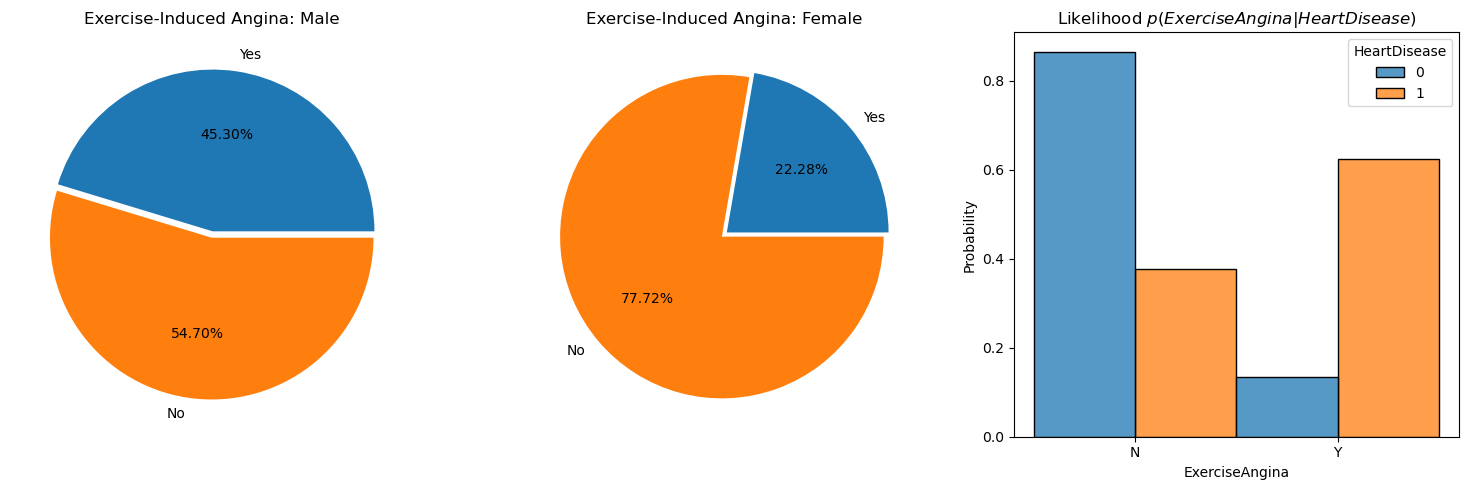

In [50]:
angina_classes = {
    'Yes': 'Y',
    'No': 'N'
}

# Status of ExerciseAngina for male and female patients
m_angina = [len(df_filled[(df_filled['Sex'] == 'M') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]
f_angina = [len(df_filled[(df_filled['Sex'] == 'F') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Exercise-Induced Angina: Male')
plt.pie(
    x=m_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 2)
plt.title('Exercise-Induced Angina: Female')
plt.pie(
    x=f_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(ExerciseAngina|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ExerciseAngina',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('ExerciseAngina.jpg', dpi=300)
plt.show()

Interpretation 1: Female patients seem to have more physical strength than male patients since the mojarity of them do not experience discomfort after physical activities.
Interpretation 2: According to likelihood function, a patient suffering from heart disease s more probable to experience difficulty and discomfort after exercise or physical activity.

4.11. Old Peak

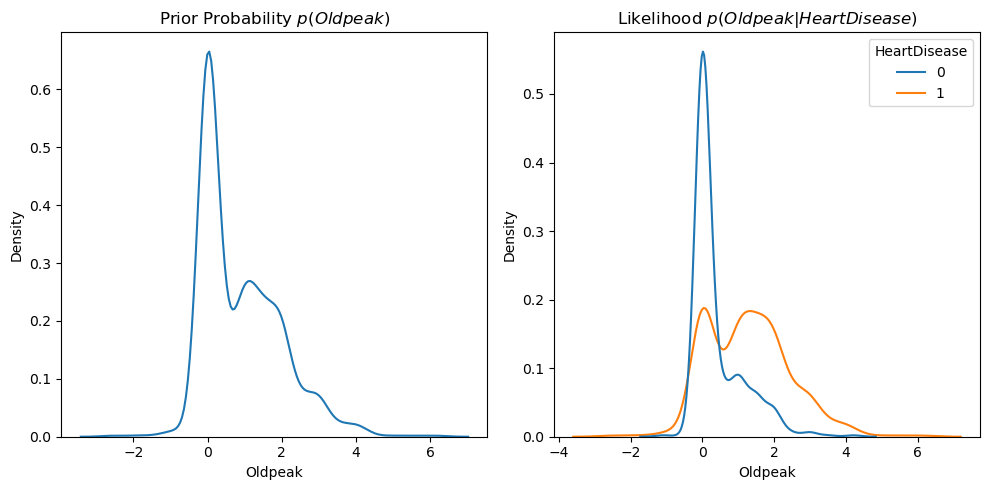

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Prior Probability $p(Oldpeak)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    ax=axes[0]
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(Oldpeak|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    hue='HeartDisease',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('Oldpeak.jpg', dpi=300)
plt.show()

Probability Distribution: Malformed Gaussian
Interpretation 1: Patients suffering from heart disease are more likely to have and old peak that is deviated from 0.

4.12. ST Slope

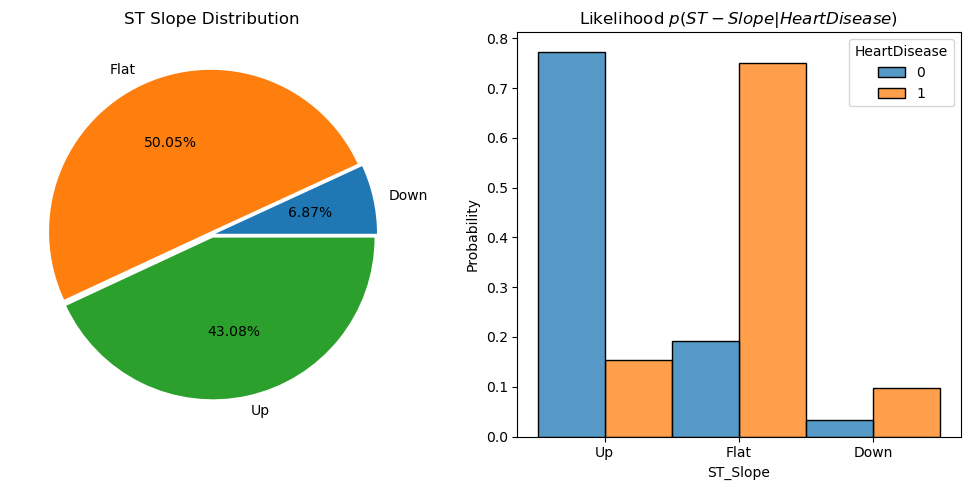

In [52]:
slope_classes = ['Down', 'Flat', 'Up']
slope_pop = [len(df_filled[df_filled['ST_Slope'] == _slope]) for _slope in slope_classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('ST Slope Distribution')
plt.pie(
    x=slope_pop,
    labels=slope_classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(slope_classes))
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(ST-Slope|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ST_Slope',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('ST Slope.jpg', dpi=300)
plt.show()

Interpretation 1: Since we are dealing with a balanced dataset with respect to heart disease, we can say that if ST slope for a patient is flat, there is a high risk of heart failure.

**Stage 5: Handling Categorical Features**

In [54]:
# In order to convert categorical features to numerical features we use Label-Encoding Approach. So we map each category to an integer.
df_filled['Sex'] = df_filled['Sex'].replace(['M', 'F'], [0, 1])
df_filled['ChestPainType'] = df_filled['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3])
df_filled['RestingECG'] = df_filled['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2])
df_filled['ExerciseAngina'] = df_filled['ExerciseAngina'].replace(['N', 'Y'], [0, 1])
df_filled['ST_Slope'] = df_filled['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0, 1, 2])

**Stage 6: Splitting Data to Train, Validation and Test Subsets**

In [55]:
X = df_filled.drop(['HeartDisease'], axis=1, inplace=False)
y = df_filled['HeartDisease']

# Divide data to train/validation/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

**Stage 7: Feature Scaling & Normalization**

In [56]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Stage 8: Training Classifiers**

In [57]:
# Declare a dictionary to save (precision, recall, f1-score) for each classifier
classifiers = {
    'Logistic Regression': (0, 0, 0),
    'SVM': (0, 0, 0),
    'Decision Tree': (0, 0, 0),
    'K-NN': (0, 0, 0),
    'Gaussian NB': (0, 0, 0)
}

8.1. Logistic Regression with l2 regularization

In [58]:
# Logistic Regression
clf_LR = LogisticRegression(max_iter=100)
clf_LR.fit(X_train, y_train)


y_pred = clf_LR.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Logistic Regression'] = (report['precision'], report['recall'], report['f1-score'])

8.2. SVM with RBF Kernel

In [59]:
# SVM
clf_SVM = SVC(kernel='rbf', C=2)
clf_SVM.fit(X_train, y_train)


y_pred = clf_SVM.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['SVM'] = (report['precision'], report['recall'], report['f1-score'])

8.3. Decision Tree with 'Entropy' criterion

In [60]:
# Decision Tree
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_DT.fit(X_train, y_train)


y_pred = clf_DT.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Decision Tree'] = (report['precision'], report['recall'], report['f1-score'])

8.4. KNN

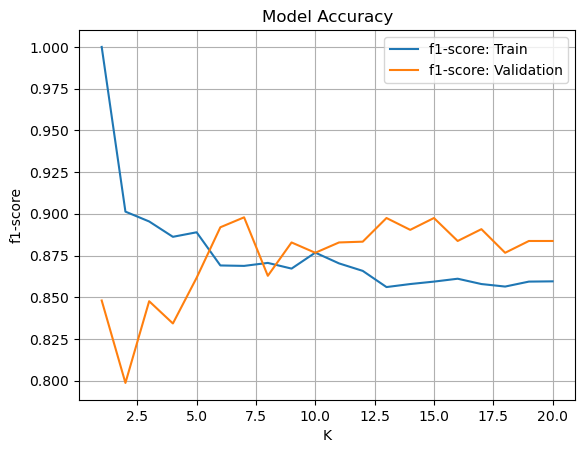

In [61]:
# KNN
trn_acc = []
val_acc = []
neighbours = range(1, 21)
for n in neighbours:
    clf_NN = KNeighborsClassifier(n_neighbors=n)
    clf_NN.fit(X_train, y_train)

    y_pred = clf_NN.predict(X_train)
    trn_acc.append(classification_report(y_train, y_pred, output_dict=True)['weighted avg']['f1-score'])

    y_pred = clf_NN.predict(X_val)
    val_acc.append(classification_report(y_val, y_pred, output_dict=True)['weighted avg']['f1-score'])

plt.title('Model Accuracy')
plt.plot(neighbours, trn_acc, label='f1-score: Train')
plt.plot(neighbours, val_acc, label='f1-score: Validation')
plt.legend(), plt.grid()
plt.xlabel('K'), plt.ylabel('f1-score')
plt.show()

It seems that K=7 leads to the best results.

In [62]:
# K =7
clf_NN = KNeighborsClassifier(n_neighbors=7)
clf_NN.fit(X_train, y_train)


y_pred = clf_NN.predict(X_val)
classification_report(y_val, y_pred, output_dict=True)['weighted avg']
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['K-NN'] = (report['precision'], report['recall'], report['f1-score'])

8.5. Gaussian Naive Bayes

In [64]:
# Gaussian Naive bayes
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)


y_pred = clf_NB.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Gaussian NB'] = (report['precision'], report['recall'], report['f1-score'])

**Stage 9: Comparing the Models**

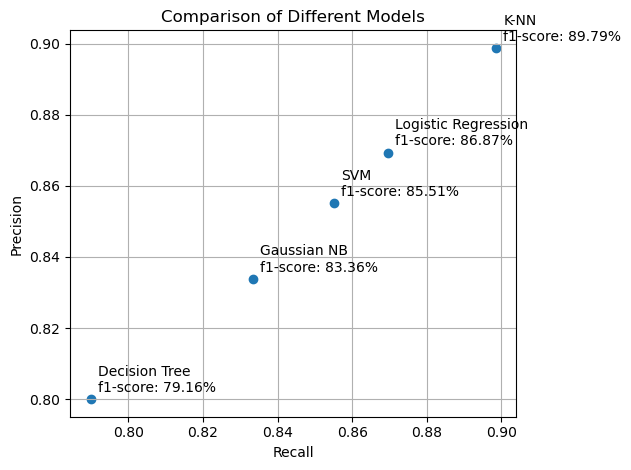

In [65]:
precision   = [classifiers[model][0] for model in classifiers.keys()]
recall      = [classifiers[model][1] for model in classifiers.keys()]
f1_score    = [classifiers[model][2] for model in classifiers.keys()]
annot        = [f'{clf}\nf1-score: {classifiers[clf][2]:.2%}' for clf in classifiers]

plt.title('Comparison of Different Models')
plt.scatter(recall, precision)

# Add label to data points
margin = 0.002
for (x, y, t) in zip(recall, precision, annot):
    plt.text(x + margin, y + margin, t)

plt.xlabel('Recall'), plt.ylabel('Precision')
plt.grid()

plt.tight_layout()
plt.savefig('PR Chart.jpg', dpi=300)
plt.show()

It seems that KNN classifier outperforms other models. So we use KNN model to make our final predictions on X_test

**Stage 10: Evaluation & Confusion Matrix**

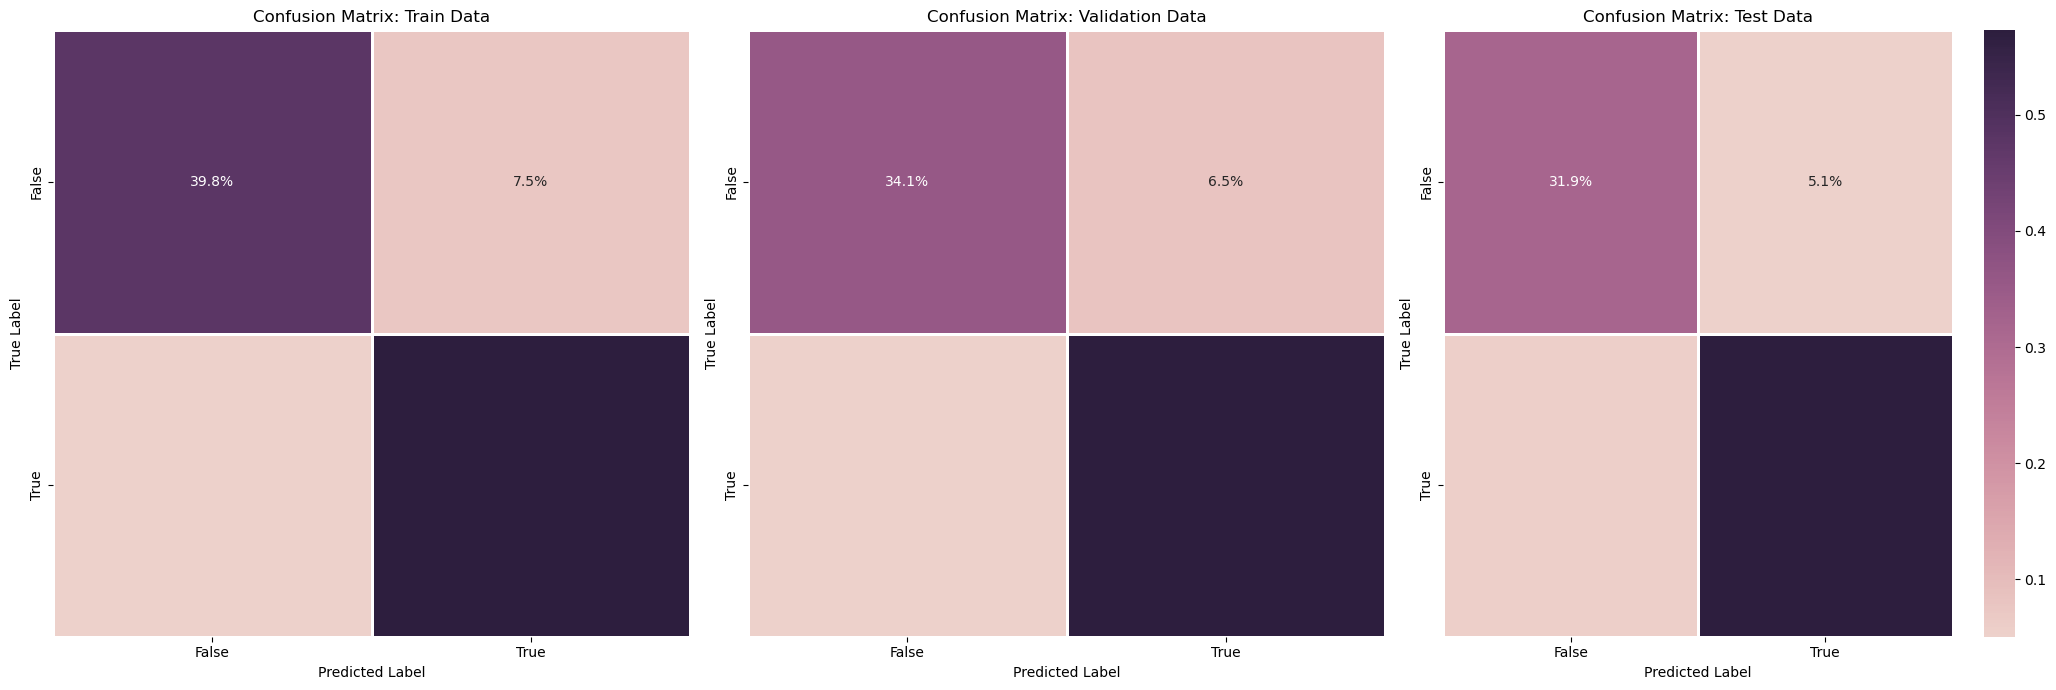

In [66]:
# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
palette = sns.cubehelix_palette(as_cmap=True)

plt.subplot(1, 3, 1)
plt.title('Confusion Matrix: Train Data')
y_pred = clf_NN.predict(X_train)
conf_mat = confusion_matrix(y_train, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[0],
    cbar=False,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')


plt.subplot(1, 3, 2)
plt.title('Confusion Matrix: Validation Data')
y_pred = clf_NN.predict(X_val)
conf_mat = confusion_matrix(y_val, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[1],
    cbar=False,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')


plt.subplot(1, 3, 3)
plt.title('Confusion Matrix: Test Data')
y_pred = clf_NN.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[2],
    cbar=True,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')

plt.tight_layout()
plt.savefig('Confusion Matrix.jpg', dpi=300)
plt.show()

**Stage 11: Final Predictions**

In [67]:
# Final prediction
y_pred = clf_NN.predict(X_test)
classification_report(y_test, y_pred, output_dict=True)['weighted avg']

{'precision': 0.8918293536594851,
 'recall': 0.8913043478260869,
 'f1-score': 0.8915178473393081,
 'support': 138}

The model has great performance on test data and achieved 89.15% f1-score

In [71]:
X_test.shape

(138, 11)

In [69]:
import pickle

pickle.dump(clf_NN, open('model_knn.pkl', 'wb'))

In [75]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [78]:
import sklearn
print(sklearn.__version__)


1.2.2
